# Bank Marketing Analiza Dataseta

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

from pylab import rcParams
rcParams['figure.figsize'] = 5, 4

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', 60)
pd.set_option('display.max_rows', 30)

## Učitavanje dataseta

In [4]:
df = pd.read_csv('data/bank-additional.csv', delimiter=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487.0,2.0,999,0.0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346.0,4.0,999,0.0,nonexistent,1.1,93.994,-36.4,4.855,5191,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227.0,1.0,999,0.0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17.0,3.0,999,0.0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58.0,1.0,999,0.0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


## Profil podataka: Raspodele, deskriptivne statistike, najčešće vrednosti, nedostajuće vrednosti

In [5]:
import pandas_profiling
df_profile = pandas_profiling.ProfileReport(df)
df_profile.to_file(outputfile='index.html')
print('Profile is saved in index.html')

Profile is saved in index.html


In [6]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
count,4119.000000,4116.000000,4114.000000,4119.000000,4117.000000,4116.000000,4117.000000,4117.000000,4117.000000
mean,40.113620,256.869048,2.534273,960.422190,0.190430,0.084694,93.579540,-40.486358,4.858993
std,10.313362,254.763913,2.566673,191.922786,0.541904,1.563361,0.579442,4.639840,79.432456
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000
75%,47.000000,317.250000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,1.266000,5099.100000


In [7]:
df.describe(include=['object'])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,nr.employed,y
count,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119,4118,4118
unique,12,4,8,3,3,3,2,10,5,3,12,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,5228.1,no
freq,1012,2509,1264,3315,2175,3349,2652,1378,860,3523,1625,3667


In [8]:
df['nr.employed'].value_counts()

5228.1    1625
5099.1     822
5191       758
5195.8     392
5076.2     164
5017.5     104
4991.6      87
4963.6      83
5008.7      60
5023.5      21
5176.3       1
no           1
Name: nr.employed, dtype: int64

In [9]:
df[df['nr.employed'] == 'no']

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
780,32,blue-collar,married,basic.4y,no,no,yes,cellular,may,thu,80.0,4.0,999,0.0,nonexistent,-1.8,92.893,1.266,5099.1,no,NaN


In [10]:
df['nr.employed'] = df['nr.employed'].replace({'no' : df['nr.employed'].mode().values[0]})

In [11]:
df['nr.employed'] = df['nr.employed'].astype('float')

In [12]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4116.000000,4114.000000,4119.000000,4117.000000,4116.000000,4117.000000,4117.000000,4117.000000,4118.000000
mean,40.113620,256.869048,2.534273,960.422190,0.190430,0.084694,93.579540,-40.486358,4.858993,5166.498057
std,10.313362,254.763913,2.566673,191.922786,0.541904,1.563361,0.579442,4.639840,79.432456,73.669363
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.250000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,1.266000,5099.100000,5228.100000


## Korelacije

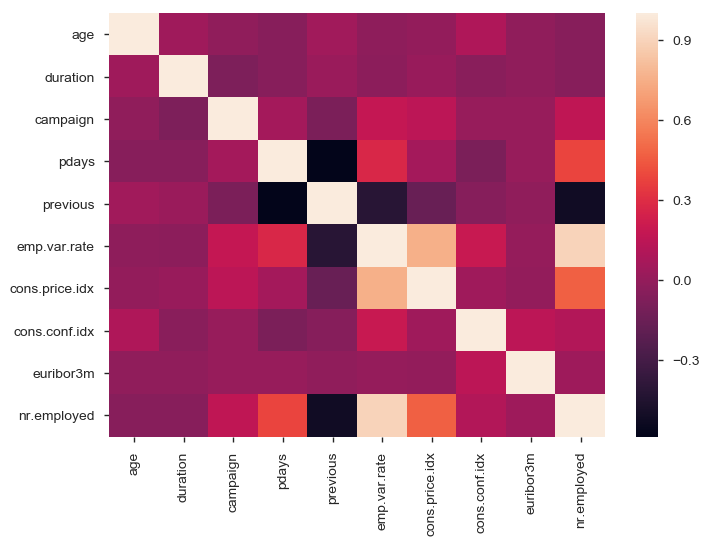

In [13]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64'] 
numeric_df = df.select_dtypes(include=numerics)

corr_matrix = numeric_df.corr(method='pearson')

sns.heatmap(corr_matrix)

## Vizualizacija podataka

In [14]:
df['calls'] = df['previous'] + df['campaign']

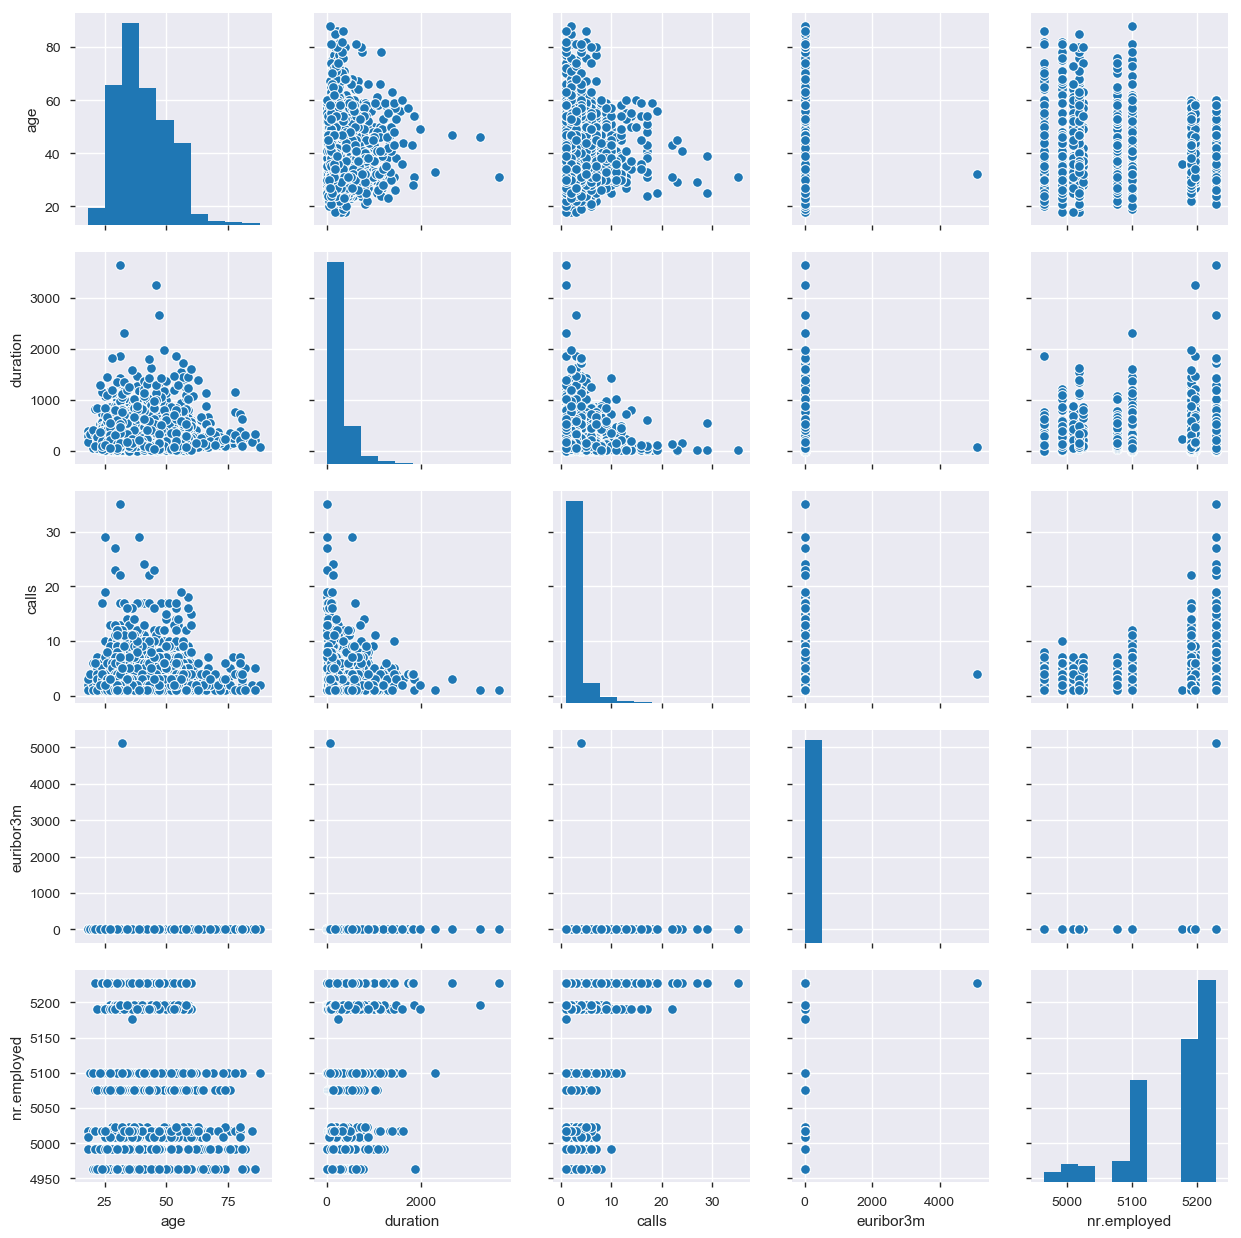

In [15]:
sns.pairplot(df[['age', 'duration', 'calls','euribor3m', 'nr.employed']]) 

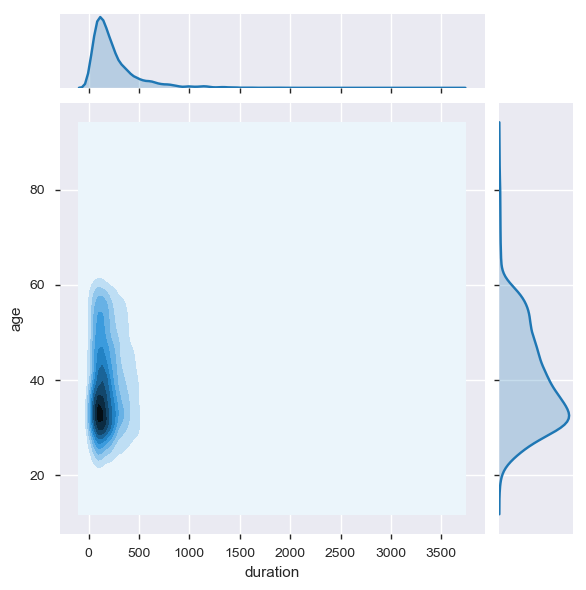

In [16]:
sns.jointplot(x='duration', y='age', data = df, kind = 'kde')

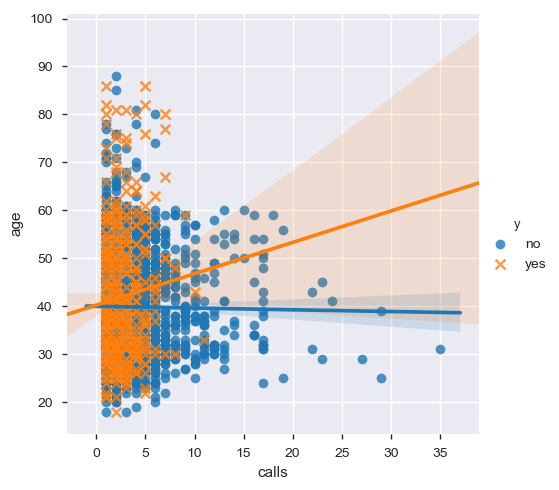

In [17]:
sns.lmplot('calls', 'age', data=df, hue='y', markers=["o", "x"])

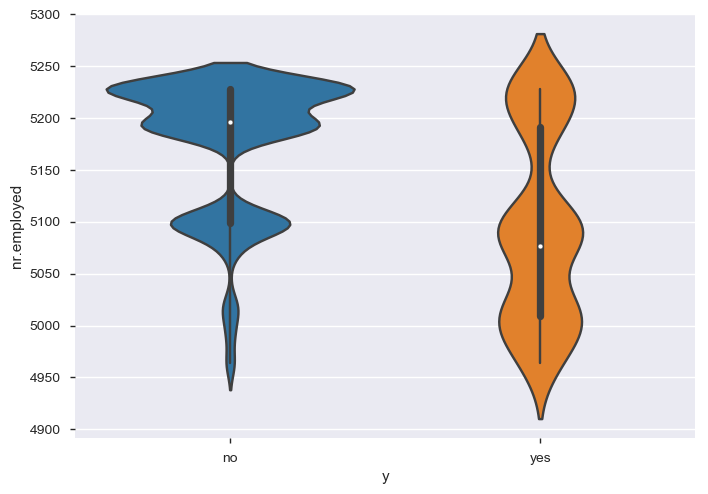

In [18]:
sns.violinplot(x='y', y='nr.employed', data=df)

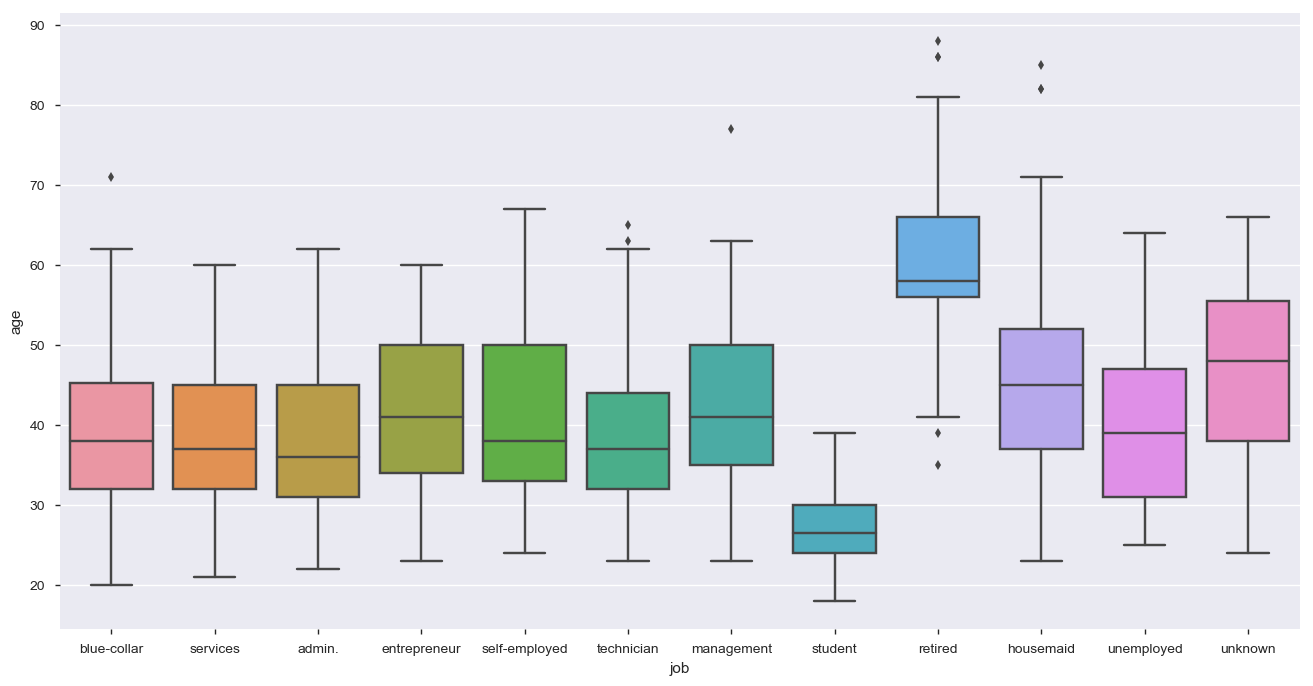

In [19]:
rcParams['figure.figsize'] = 16,8
sns.boxplot(x='job', y='age', data=df)

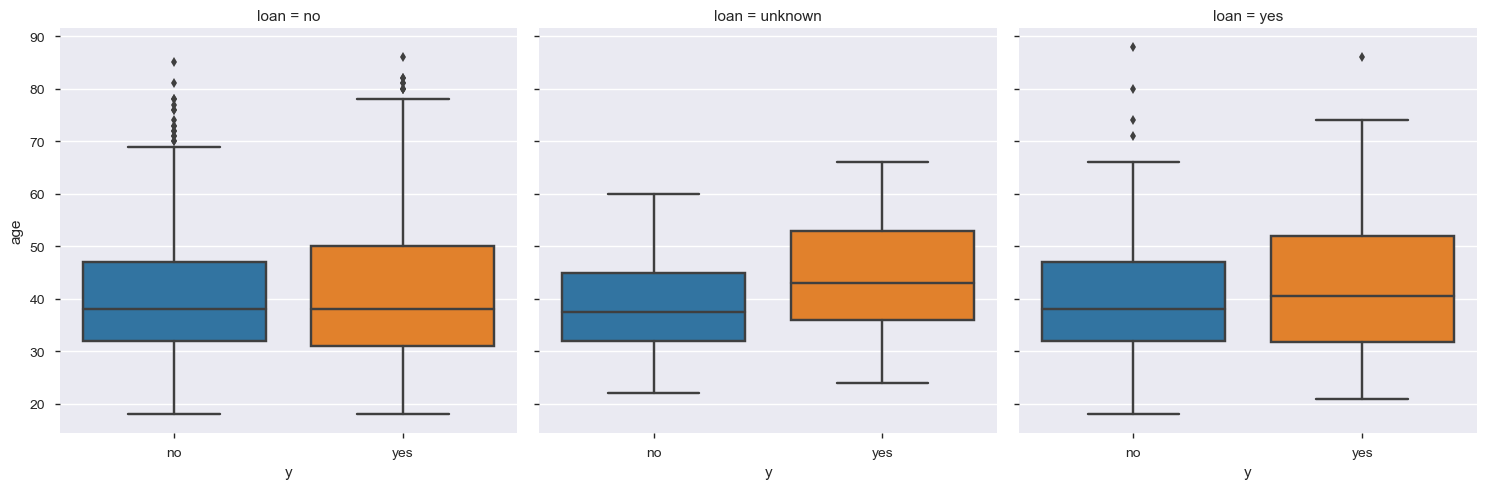

In [20]:
sns.catplot(x='y', y='age', col='loan', data=df, kind='box')

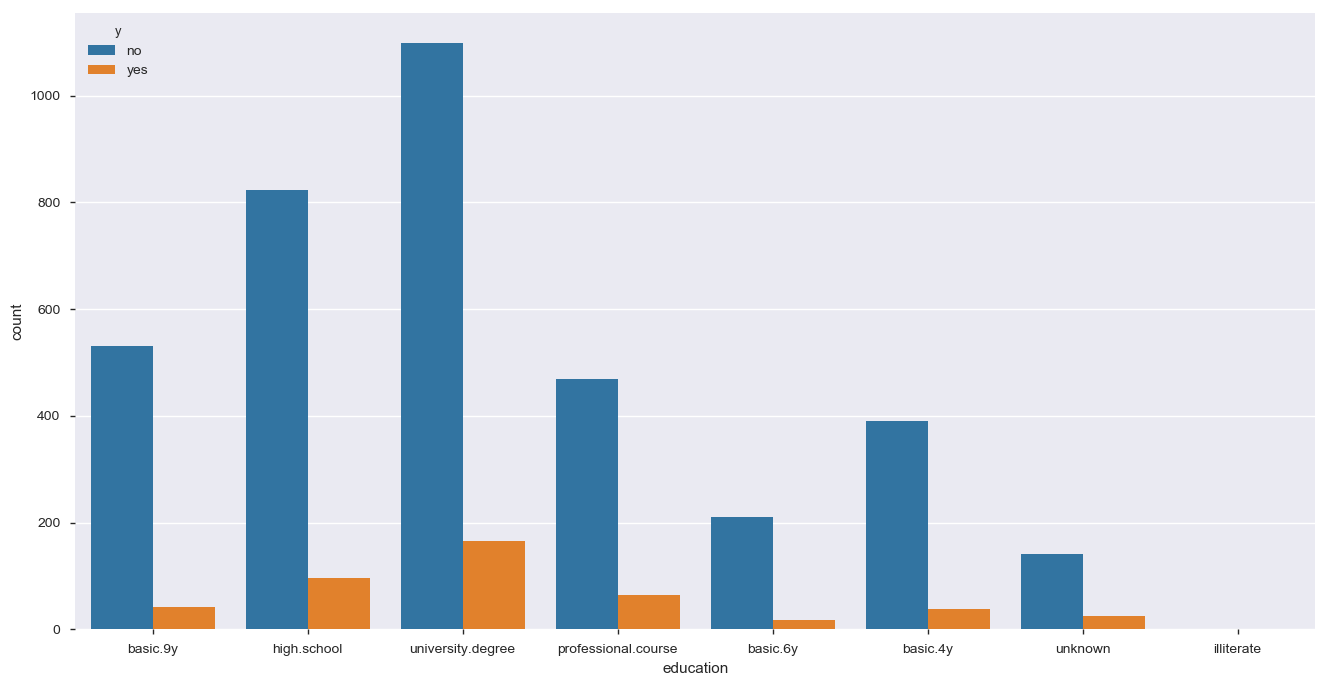

In [21]:
sns.countplot(x='education', hue='y', data=df)

In [22]:
pd.crosstab(df['y'], df['education'])

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
y,,,,,,,,
no,390,211,531,824,1,470,1099,141
yes,38,17,43,97,0,65,165,26


## Priprema podataka

### Popunjavanje nedostajućih vrednosti

In [23]:
df.isnull().sum().sum()

28

In [24]:
for col in list(df.columns):
    print(col, df[col].isnull().sum())

age 0
job 0
marital 0
education 0
default 0
housing 0
loan 0
contact 0
month 0
day_of_week 0
duration 3
campaign 5
pdays 0
previous 2
poutcome 0
emp.var.rate 3
cons.price.idx 2
cons.conf.idx 2
euribor3m 2
nr.employed 1
y 1
calls 7


In [25]:
df = df.dropna(subset=['y'])

In [26]:
df.drop(columns=['calls'], inplace=True)

In [27]:
econ_cols = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
for col in econ_cols:
    df[col] = df[col].fillna(df[col].mode().values[0])

In [28]:
df[df.previous.isnull()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
279,23,entrepreneur,married,university.degree,no,yes,no,cellular,aug,thu,87.0,1.0,999,NaN,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
625,27,services,single,high.school,unknown,no,no,cellular,jul,tue,509.0,4.0,999,NaN,nonexistent,1.4,93.918,-42.7,4.962,5228.1,yes


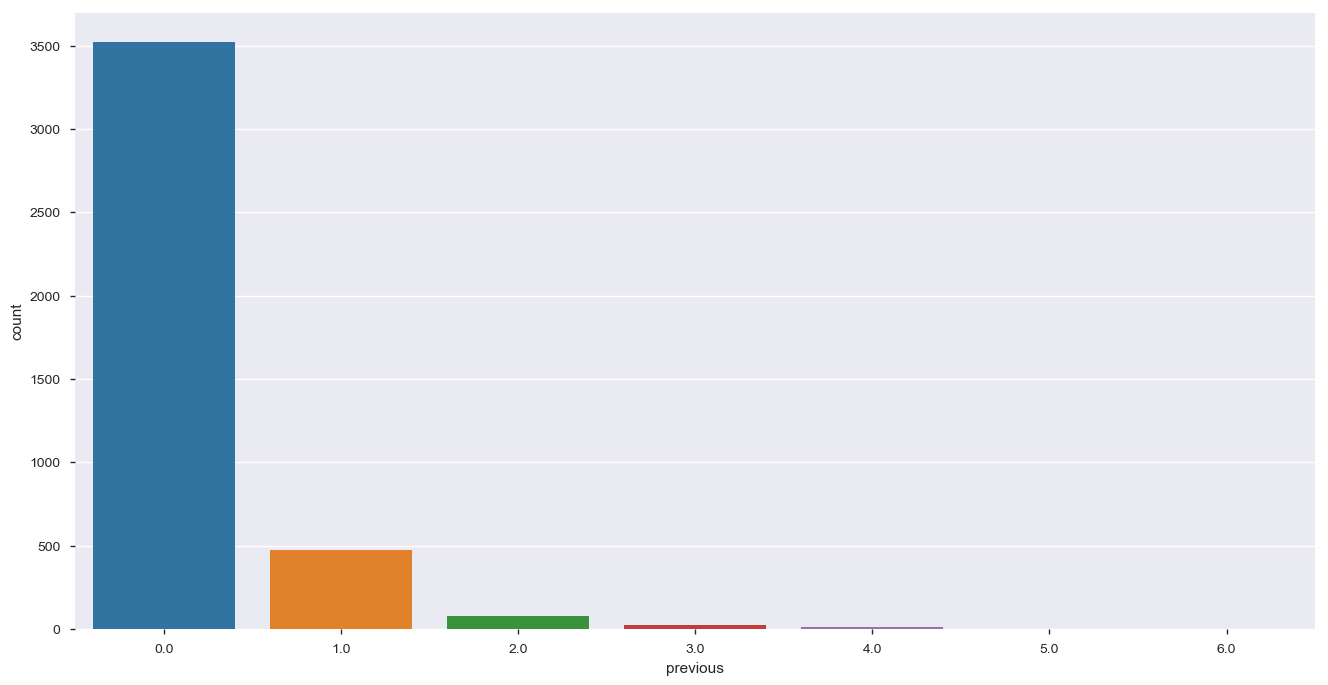

In [29]:
sns.countplot(x='previous', data=df)

In [30]:
df.previous = df.previous.fillna(0.0)

In [31]:
df[df.campaign.isnull()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
117,53,services,married,high.school,unknown,no,no,telephone,may,thu,203.0,NaN,999,0.0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no
312,30,technician,married,university.degree,unknown,yes,no,telephone,may,wed,72.0,NaN,999,0.0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no
375,31,technician,single,professional.course,no,unknown,unknown,cellular,aug,mon,202.0,NaN,999,0.0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
563,47,retired,married,basic.4y,unknown,unknown,unknown,telephone,may,wed,441.0,NaN,999,0.0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
687,42,blue-collar,married,basic.9y,unknown,no,no,telephone,may,fri,148.0,NaN,999,0.0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,no


In [32]:
df.campaign.describe()

count    4113.000000
mean        2.533917
std         2.566883
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        35.000000
Name: campaign, dtype: float64

In [33]:
df.campaign = df.campaign.fillna(df.campaign.mode().values[0])

In [34]:
df[df.duration.isnull()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
9,35,blue-collar,married,basic.9y,unknown,no,no,telephone,may,thu,NaN,1.0,999,0.0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
149,40,admin.,divorced,university.degree,no,yes,no,cellular,aug,mon,NaN,1.0,999,0.0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
344,51,unknown,married,unknown,unknown,yes,no,cellular,aug,fri,NaN,5.0,999,0.0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no


In [35]:
df.duration.describe()

count    4115.000000
mean      256.912029
std       254.779948
min         0.000000
25%       103.000000
50%       181.000000
75%       317.500000
max      3643.000000
Name: duration, dtype: float64

In [36]:
df.duration = df.duration.fillna(df.duration.mode().values[0])

In [37]:
df.isnull().sum().sum()

0

### Rad sa kategoričkim atributima

In [38]:
df.describe(include=['object'])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,4118,4118,4118,4118,4118,4118,4118,4118,4118,4118,4118
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,1012,2508,1264,3314,2175,3349,2651,1377,859,3522,3667


In [39]:
df.default.value_counts()

no         3314
unknown     803
yes           1
Name: default, dtype: int64

In [40]:
pd.crosstab(df['y'], df['default'])

default,no,unknown,yes
y,,,
no,2912,754,1
yes,402,49,0


In [41]:
df.drop(columns=['default'], inplace=True)

In [42]:
df.education.unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [43]:
education_mapping_dict = {
    'illiterate': 0,
    'unknown': 1,
    'basic.4y': 1,
    'basic.6y': 2,
    'basic.9y': 3,
    'high.school' : 4,
    'professional.course': 5,
    'university.degree': 6
}
df.education.replace(education_mapping_dict, inplace=True)

In [44]:
df.education.value_counts()

6    1264
4     921
1     595
3     574
5     535
2     228
0       1
Name: education, dtype: int64

In [45]:
df.month.unique()

array(['may', 'jun', 'nov', 'sep', 'jul', 'aug', 'mar', 'oct', 'apr',
       'dec'], dtype=object)

In [46]:
month_mapping_dict = {
    'mar': 3, 
    'apr': 4,
    'may': 5, 
    'jun': 6, 
    'jul': 7, 
    'aug': 8, 
    'sep': 9, 
    'oct': 10,
    'nov': 11,
    'dec': 12
}
df.month.replace(month_mapping_dict, inplace=True)

In [47]:
df.day_of_week.unique()

array(['fri', 'wed', 'mon', 'thu', 'tue'], dtype=object)

In [48]:
day_of_week_dict = {
    'mon': 1,
    'tue': 2,
    'wed': 3,
    'thu': 4,
    'fri': 5
}
df.day_of_week.replace(day_of_week_dict, inplace=True)

In [49]:
df.describe(include=['object'])

,job,marital,housing,loan,contact,poutcome,y
count,4118,4118,4118,4118,4118,4118,4118
unique,12,4,3,3,2,3,2
top,admin.,married,yes,no,cellular,nonexistent,no
freq,1012,2508,2175,3349,2651,3522,3667


In [50]:
df.marital.value_counts()

married     2508
single      1153
divorced     446
unknown       11
Name: marital, dtype: int64

In [51]:
df.housing.value_counts()

yes        2175
no         1838
unknown     105
Name: housing, dtype: int64

In [52]:
df.query('housing == \'unknown\'').describe(include=['object'])

,job,marital,housing,loan,contact,poutcome,y
count,105,105,105,105,105,105,105
unique,10,3,1,1,2,3,2
top,blue-collar,married,unknown,unknown,cellular,nonexistent,no
freq,28,68,105,105,62,86,96


In [53]:
df.query('housing == \'unknown\' and education < 4 and age < 30').shape

(4, 20)

In [54]:
df.query('housing == \'unknown\' and loan == \'unknown\'').shape

(105, 20)

In [55]:
df_cat = df[['marital', 'loan', 'housing']]

In [56]:
df.marital.value_counts()

married     2508
single      1153
divorced     446
unknown       11
Name: marital, dtype: int64

In [57]:
df_cat_dummies = pd.get_dummies(df[['marital', 'loan', 'housing']])
df_cat_dummies.drop(columns=['marital_unknown', 'loan_unknown', 'housing_unknown'], inplace=True)

In [58]:
df = pd.concat([df, df_cat_dummies], axis=1)
df.drop(columns=['marital', 'loan', 'housing'], inplace=True)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4118 entries, 0 to 4118
Data columns (total 24 columns):
age                 4118 non-null int64
job                 4118 non-null object
education           4118 non-null int64
contact             4118 non-null object
month               4118 non-null int64
day_of_week         4118 non-null int64
duration            4118 non-null float64
campaign            4118 non-null float64
pdays               4118 non-null int64
previous            4118 non-null float64
poutcome            4118 non-null object
emp.var.rate        4118 non-null float64
cons.price.idx      4118 non-null float64
cons.conf.idx       4118 non-null float64
euribor3m           4118 non-null float64
nr.employed         4118 non-null float64
y                   4118 non-null object
marital_divorced    4118 non-null uint8
marital_married     4118 non-null uint8
marital_single      4118 non-null uint8
loan_no             4118 non-null uint8
loan_yes            4118 non-null

In [60]:
df.contact.value_counts()

cellular     2651
telephone    1467
Name: contact, dtype: int64

In [61]:
pd.crosstab(df['y'], df['poutcome'])

poutcome,failure,nonexistent,success
y,,,
no,387,3230,50
yes,67,292,92


In [62]:
df['contact_is_cellular'] = df.contact.replace({ 'cellular': 1, 'telephone': 0})
df['was_success'] = df.poutcome.replace({'success': 1, 'failure':0, 'nonexistent':0 })
df.drop(columns=['contact', 'poutcome'],inplace=True)

In [63]:
df_job_dummies = pd.get_dummies(df[['job']])
df = pd.concat([df, df_job_dummies], axis=1)
df.drop(columns=['job', 'job_unknown'], inplace=True)
df.head()

,age,education,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,marital_divorced,marital_married,marital_single,loan_no,loan_yes,housing_no,housing_yes,contact_is_cellular,was_success,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,30,3,5,5,487.0,2.0,999,0.0,-1.8,92.893,-46.2,1.313,5099.1,no,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0
1,39,4,5,5,346.0,4.0,999,0.0,1.1,93.994,-36.4,4.855,5191.0,no,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,25,4,6,3,227.0,1.0,999,0.0,1.4,94.465,-41.8,4.962,5228.1,no,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,38,3,6,5,17.0,3.0,999,0.0,1.4,94.465,-41.8,4.959,5228.1,no,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,47,6,11,1,58.0,1.0,999,0.0,-0.1,93.200,-42.0,4.191,5195.8,no,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0


In [64]:
df.shape

(4118, 34)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4118 entries, 0 to 4118
Data columns (total 34 columns):
age                    4118 non-null int64
education              4118 non-null int64
month                  4118 non-null int64
day_of_week            4118 non-null int64
duration               4118 non-null float64
campaign               4118 non-null float64
pdays                  4118 non-null int64
previous               4118 non-null float64
emp.var.rate           4118 non-null float64
cons.price.idx         4118 non-null float64
cons.conf.idx          4118 non-null float64
euribor3m              4118 non-null float64
nr.employed            4118 non-null float64
y                      4118 non-null object
marital_divorced       4118 non-null uint8
marital_married        4118 non-null uint8
marital_single         4118 non-null uint8
loan_no                4118 non-null uint8
loan_yes               4118 non-null uint8
housing_no             4118 non-null uint8
housing_yes     

### Izbacivanje izuzetaka

In [66]:
columns = ['age', 'campaign', 'duration']

In [67]:
df.shape

(4118, 34)

In [68]:
from scipy import stats

z = np.abs(stats.zscore(df[columns]))
df = df[(z < 3).all(axis=1)]
df.shape

(3913, 34)

# Klasifikacija

**Podela na trening i test podatke**

In [69]:
X = df.drop('y', axis=1)
y = df['y'].map({'yes':1, 'no': 0})

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

**Skaliranje podataka**

In [81]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Balansiranje podataka**

In [98]:
from imblearn.under_sampling import RandomUnderSampler

under_sampler = RandomUnderSampler(random_state=0)
X_train, y_train = under_sampler.fit_resample(X_train, y_train)

In [99]:
X_test.shape

(1174, 33)

**Modeli sa default parametrima**

In [100]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [101]:
from sklearn.naive_bayes import GaussianNB

model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [102]:
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier()
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [103]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

**Evaluacija na trening skupu**

In [104]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score

In [105]:
from prettytable import PrettyTable

def testiranje(models, scores, X_fun=X_train, y_fun=y_train):
    for model in models:
        print(str(model).split('(')[0])
        y_pred = model.predict(X_fun)
        t = PrettyTable(['Mera evaluacije', 'Rezultat'])
        for score in scores:
            s = score(y_fun, y_pred)
            t.add_row([str(score).split()[1], s])
        print(t)
        print('\n')

In [106]:
models = [model_lr, model_nb, model_tree, model_knn]
scores = [accuracy_score, precision_score, recall_score, roc_auc_score]

testiranje(models, scores, X_train, y_train)

LogisticRegression
+-----------------+--------------------+
| Mera evaluacije |      Rezultat      |
+-----------------+--------------------+
|  accuracy_score | 0.8530465949820788 |
| precision_score | 0.8456140350877193 |
|   recall_score  | 0.8637992831541219 |
|  roc_auc_score  | 0.853046594982079  |
+-----------------+--------------------+


GaussianNB
+-----------------+--------------------+
| Mera evaluacije |      Rezultat      |
+-----------------+--------------------+
|  accuracy_score | 0.7616487455197133 |
| precision_score | 0.8288288288288288 |
|   recall_score  | 0.6594982078853047 |
|  roc_auc_score  | 0.7616487455197133 |
+-----------------+--------------------+


DecisionTreeClassifier
+-----------------+----------+
| Mera evaluacije | Rezultat |
+-----------------+----------+
|  accuracy_score |   1.0    |
| precision_score |   1.0    |
|   recall_score  |   1.0    |
|  roc_auc_score  |   1.0    |
+-----------------+----------+


KNeighborsClassifier
+---------------

**Evaluacija na test skupu**

In [107]:
testiranje(models, scores, X_test, y_test)

LogisticRegression
+-----------------+--------------------+
| Mera evaluacije |      Rezultat      |
+-----------------+--------------------+
|  accuracy_score | 0.8568994889267462 |
| precision_score | 0.3514644351464435 |
|   recall_score  | 0.865979381443299  |
|  roc_auc_score  | 0.8610305449463478 |
+-----------------+--------------------+


GaussianNB
+-----------------+--------------------+
| Mera evaluacije |      Rezultat      |
+-----------------+--------------------+
|  accuracy_score | 0.8390119250425895 |
| precision_score | 0.2850467289719626 |
|   recall_score  | 0.6288659793814433 |
|  roc_auc_score  | 0.7434023490221979 |
+-----------------+--------------------+


DecisionTreeClassifier
+-----------------+--------------------+
| Mera evaluacije |      Rezultat      |
+-----------------+--------------------+
|  accuracy_score | 0.813458262350937  |
| precision_score | 0.2867132867132867 |
|   recall_score  | 0.845360824742268  |
|  roc_auc_score  | 0.8279728914797692 |


**Evaluacija unakrsnom validacijom**

In [108]:
from sklearn.model_selection import cross_val_score

In [109]:
for model, label in zip([model_lr, model_nb, model_tree, model_knn], ['Logisticka regresija', 'Naive bayes','Stablo odlucivanja', 'K-NN']):
    scores = cross_val_score(model, X, y, cv=100, scoring='accuracy')
    print('[%s] Tacnost: %0.2f +/- %0.2f' % (label, scores.mean(), scores.std()))

[Logisticka regresija] Tacnost: 0.92 +/- 0.03
[Naive bayes] Tacnost: 0.87 +/- 0.05
[Stablo odlucivanja] Tacnost: 0.89 +/- 0.04
[K-NN] Tacnost: 0.91 +/- 0.04


## Klasifikacija - 2. deo